In [1271]:
#importing necessary libraries
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, LabelEncoder, PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.metrics import mean_squared_error, mean_absolute_error, roc_curve, roc_auc_score, plot_roc_curve
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestClassifier
from scipy.stats import norm, stats, zscore
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import statistics as st
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import pickle



#import plotty
import warnings
warnings.filterwarnings('ignore')

In [1272]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df.head(5) #read the csv file

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1273]:
df.shape #check the shape of the dataset

(891, 12)

In [1274]:
df.describe() # analyize more information 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [1275]:
df.info() #check the null values and Dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1276]:
df.drop(columns = 'Name', inplace = True) #drop the unnecessary column

In [1277]:
df.drop(columns = 'Ticket', inplace = True)#drop the unnecessary column

In [1278]:
df.drop(columns = 'Cabin', inplace = True)#drop the unnecessary column

In [1279]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


# Column1: PassengerId

In [1280]:
df['PassengerId'].unique() #check the unique values
#i think everything is clear, no missing values are there, so, switch to second column now

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

# Column2: Pclass

In [1281]:
df['Pclass'].unique() #check the unique values

array([3, 1, 2], dtype=int64)

In [1282]:
df['Pclass'].value_counts() #check the number of counts

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [1283]:
df['Pclass'].all() #check the zeros present in column

True

In [1284]:
df['Pclass'].isna().sum() #check for null values

0

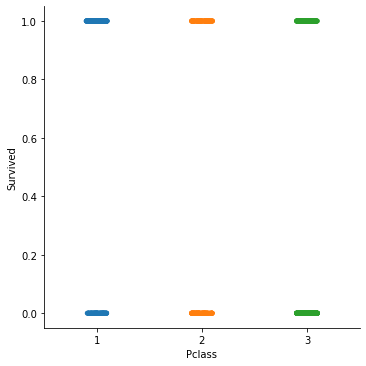

In [1285]:
sns.catplot(x = 'Pclass', y ='Survived', data=df) #visualize by using catplot

<AxesSubplot:xlabel='Pclass', ylabel='Density'>

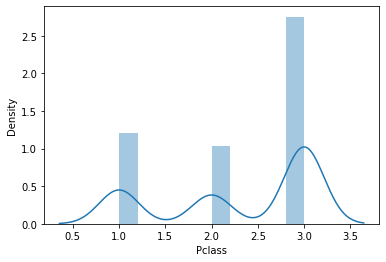

In [1286]:
sns.distplot(df['Pclass'])  #visualize by using distplot

# Column3: Sex

In [1287]:
df.head(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.25,S


In [1288]:
df['Sex'].unique() #check the unique values 

array(['male', 'female'], dtype=object)

In [1289]:
df['Sex'].value_counts() #check the number of counts

male      577
female    314
Name: Sex, dtype: int64

In [1290]:
lab_enc = LabelEncoder() #using label encoder to convert object value into integer

In [1291]:
df_sex = lab_enc.fit_transform(df['Sex'])

In [1292]:
df['Sex'] = df_sex #save it to our column

In [1293]:
df['Sex'].unique() #now, again check the unique value

array([1, 0])

In [1294]:
df['Sex'].isna().sum() #check for null values

0

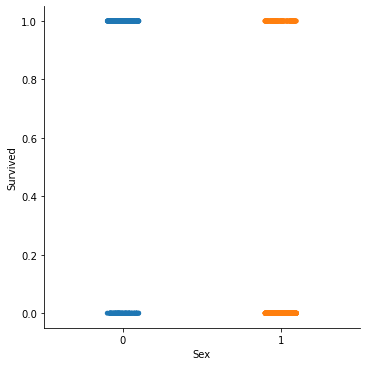

In [1295]:
sns.catplot(x ='Sex', y='Survived', data = df)  #visualize by using catplot

<AxesSubplot:xlabel='Sex', ylabel='Density'>

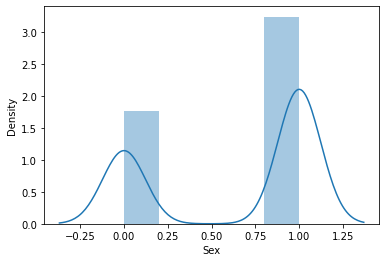

In [1296]:
sns.distplot(df['Sex'])  #visualize by using distplot

In [1297]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,S
1,2,1,1,0,38.0,1,0,71.2833,C
2,3,1,3,0,26.0,0,0,7.9250,S
3,4,1,1,0,35.0,1,0,53.1000,S
4,5,0,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,S
887,888,1,1,0,19.0,0,0,30.0000,S
888,889,0,3,0,NaN,1,2,23.4500,S
889,890,1,1,1,26.0,0,0,30.0000,C


# Column4 : Age

In [1298]:
df['Age'].unique() #check for unique value

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [1299]:
df['Age'].all() #check for zero values

True

In [1300]:
df['Age'].isna().sum() #check for null values

177

In [1301]:
si = SimpleImputer() #using simple imputer to remove null values

In [1302]:
ct = make_column_transformer((si, ['Age']), remainder = 'passthrough')

In [1303]:
a = ct.fit_transform(df)

In [1304]:
df['Age'] = a #save it to our column

In [1305]:
df['Age'].isna().sum() #now, check the null values

0

<AxesSubplot:>

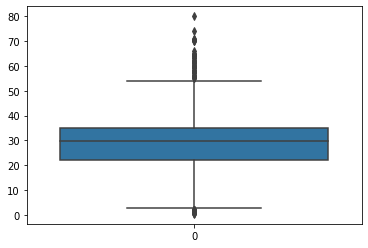

In [1306]:
sns.boxplot(data = df['Age']) #visualize by using boxplot

In [1307]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['Age'], 25,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['Age'], 75,
                   interpolation = 'midpoint')
iqr = q3 - q1

In [1308]:
# higher side 
higher_side = df['Age'] >= (q3+1.5*iqr)
print("Higher: \n", higher_side)
print(np.where(higher_side))
high = np.where(higher_side)
 
# lower side 
lower_side = df['Age'] <= (q1-1.5*iqr)
print("Lower: \n", lower_side)
low = np.where(lower_side)
print(np.where(lower_side))
print("old Shape: ", df.shape)

Higher: 
 0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool
(array([ 11,  15,  33,  54,  94,  96, 116, 152, 170, 174, 195, 232, 252,
       268, 275, 280, 326, 366, 438, 456, 467, 483, 487, 492, 493, 545,
       555, 570, 587, 625, 626, 630, 647, 659, 672, 684, 694, 745, 772,
       829, 851, 879], dtype=int64),)
Lower: 
 0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool
(array([  7,  16,  78, 119, 164, 172, 183, 205, 297, 305, 340, 381, 386,
       469, 479, 530, 642, 644, 755, 788, 803, 824, 827, 831], dtype=int64),)
old Shape:  (891, 9)


In [1309]:
#removing the outliers
print("Old Shape: ", df.shape)
df = df.drop(df.index[high])
df = df.drop(df.index[low])
 
print("New Shape: ", df.shape)

Old Shape:  (891, 9)
New Shape:  (825, 9)


In [1310]:
df.shape #check the shape of the column

(825, 9)

# Column5: SibSp

In [1311]:
df['SibSp'].unique() #check for unique values

array([1, 0, 4, 3, 2, 5, 8], dtype=int64)

In [1312]:
df['SibSp'].value_counts() #check for number of counts

0    552
1    201
2     28
4     17
3     15
8      7
5      5
Name: SibSp, dtype: int64

In [1313]:
df['SibSp'].isna().sum() #check for null values

0

<AxesSubplot:xlabel='SibSp', ylabel='Count'>

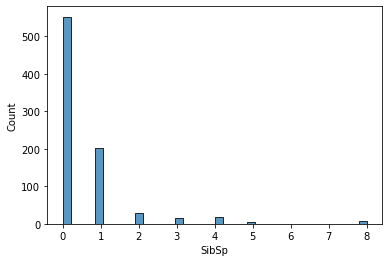

In [1314]:
sns.histplot(df['SibSp']) #visualize by using histogram

In [1315]:
# calculate the mean, median, mode to check how much our column is skewed  
print('mean of the column-------> ',df['SibSp'].mean())
print('median of the column--------> ',df['SibSp'].median())
print('mode of the column--------> ', st.mode(df['SibSp']))

mean of the column------->  0.5466666666666666
median of the column-------->  0.0
mode of the column-------->  0


# Column6: Parch

In [1316]:
df['Parch'].unique()

array([0, 2, 1, 5, 3, 4, 6], dtype=int64)

In [1317]:
df['Parch'].isna().sum()

0

In [1318]:
df['Parch'].value_counts()

0    625
1    109
2     77
3      5
5      5
4      3
6      1
Name: Parch, dtype: int64

# Column7: fare

In [1319]:
df['Fare'].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  11.1333,  30.0708,  16.7   ,  31.275 ,   7.8542,
        29.125 ,  13.    ,   7.225 ,  26.    ,   8.0292,  35.5   ,
        21.075 ,  31.3875, 263.    ,   7.8792,   7.8958,  27.7208,
       146.5208,   7.75  ,  82.1708,  52.    ,   7.2292,  18.    ,
        11.2417,   9.475 ,  21.    ,  41.5792,  15.5   ,  21.6792,
        17.8   ,  39.6875,   7.8   ,  76.7292,  10.5   ,  27.75  ,
        46.9   ,  80.    ,  83.475 ,  27.9   ,  15.2458,   8.1583,
         8.6625,  73.5   ,  14.4542,  56.4958,   7.65  ,  29.    ,
        12.475 ,   9.    ,   9.5   ,  47.1   ,  15.85  ,  34.375 ,
        61.175 ,  20.575 ,  63.3583,  23.    ,  77.2875,   8.6542,
         7.775 ,  24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,
        22.3583,   6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,
         9.2167,  79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,
        12.525 ,  66.6   ,   7.3125,  61.3792,   7.7333,  69.5

In [1320]:
df['Fare'].value_counts()

8.0500     41
13.0000    40
7.8958     35
7.7500     31
26.0000    29
           ..
61.1750     1
15.0000     1
7.5208      1
26.3875     1
8.4333      1
Name: Fare, Length: 236, dtype: int64

In [1321]:
df['Fare'].all()

False

In [1322]:
df['Fare'] = df['Fare'].replace(0,df['Fare'].mean())

In [1323]:
df['Fare'].all()

True

In [1324]:
df['Fare'].isna().sum()

0

<AxesSubplot:>

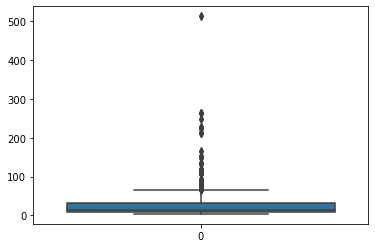

In [1325]:
sns.boxplot(data = df['Fare'])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

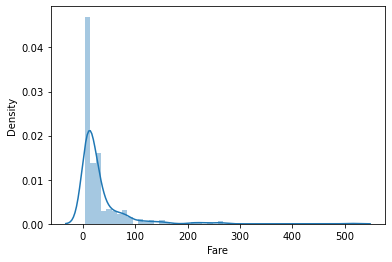

In [1326]:
sns.distplot(df['Fare'])

In [1327]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['Fare'], 25,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['Fare'], 60,
                   interpolation = 'midpoint')
iqr = q3 - q1

In [1328]:
# higher side 
higher_side = df['Fare'] >= (q3+1.5*iqr)
print("Higher:", higher_side)
print(np.where(higher_side))
high = np.where(higher_side)
 
# lower side 
lower_side = df['Fare'] <= (q1-1.5*iqr)
print("Lower:", lower_side)
low = np.where(lower_side)
print(np.where(lower_side))
print("old Shape: ", df.shape)

Higher: 0      False
1       True
2      False
3       True
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Fare, Length: 825, dtype: bool
(array([  1,   3,   6,  23,  27,  29,  30,  47,  53,  55,  56,  65,  66,
        68,  76,  81,  85,  88,  93, 101, 108, 110, 114, 126, 128, 140,
       143, 147, 154, 157, 165, 169, 183, 197, 199, 205, 211, 225, 228,
       235, 236, 237, 241, 247, 266, 267, 273, 275, 281, 282, 283, 285,
       286, 287, 293, 294, 298, 299, 302, 305, 307, 309, 310, 314, 329,
       340, 341, 344, 346, 348, 351, 354, 356, 357, 361, 364, 381, 403,
       404, 413, 421, 424, 441, 446, 449, 451, 457, 459, 465, 469, 473,
       480, 483, 487, 497, 499, 500, 504, 509, 515, 527, 533, 537, 541,
       546, 554, 564, 570, 576, 580, 593, 595, 597, 606, 610, 615, 619,
       621, 626, 628, 630, 635, 636, 638, 643, 645, 653, 655, 657, 661,
       669, 675, 682, 686, 687, 692, 698, 703, 707, 709, 722, 724, 732,
       735, 744, 75

In [1329]:
#removing the outliers
df = df.drop(df.index[low])
df = df.drop(df.index[high])
 
print("New Shape: ", df.shape)

New Shape:  (669, 9)


<AxesSubplot:>

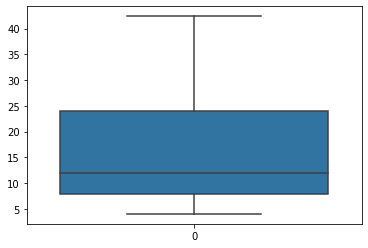

In [1330]:
sns.boxplot(data = df['Fare'])

In [1331]:
df.head(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.25,S


# Column8: Embarked

In [1332]:
df['Embarked'].unique()

array(['S', 'Q', 'C'], dtype=object)

In [1333]:
lab_enc = LabelEncoder()

In [1334]:
df_e = lab_enc.fit_transform(df['Embarked'])

In [1335]:
df['Embarked'] = df_e

In [1336]:
df['Embarked'].unique()

array([2, 1, 0])

In [1337]:
df['Embarked'].isna().sum()

0

In [1338]:
# analyize the correlation
corr = df.corr()
corr.shape

(8, 8)

<function matplotlib.pyplot.show(close=None, block=None)>

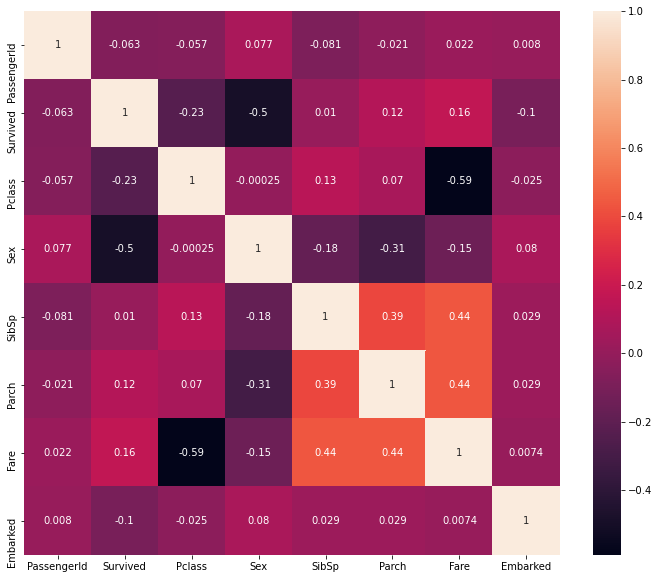

In [1339]:
# Visualize the corrrelation by using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show

In [1340]:
#split x and y
x = df.drop(['Survived'], axis=1)
y=df.Survived

In [1341]:
x.shape

(669, 8)

In [1342]:
y.shape

(669,)

In [1343]:
#scale the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-1.72986177,  0.64448699,  0.67874788, ..., -0.43490177,
        -0.89149778,  0.54487837],
       [-1.72211659,  0.64448699, -1.47330109, ..., -0.43490177,
        -0.81911372,  0.54487837],
       [-1.7143714 ,  0.64448699,  0.67874788, ..., -0.43490177,
        -0.80570926,  0.54487837],
       ...,
       [ 1.70899956,  0.64448699, -1.47330109, ...,  2.13987065,
         0.84571957,  0.54487837],
       [ 1.71287215, -2.47987384,  0.67874788, ..., -0.43490177,
         1.548113  , -2.19590081],
       [ 1.71674474,  0.64448699,  0.67874788, ..., -0.43490177,
        -0.83787996, -0.82551122]])

In [1344]:
# Check the multicollinearity between the features
#import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"]= [ variance_inflation_factor(x_scaled, i)
               for i in range ( x_scaled.shape[1])]
vif['features']= x.columns
vif #less corelation between the features

,vif,features
0,1.015930,PassengerId
1,2.606756,Pclass
2,1.134741,Sex
3,1.221584,Age
4,1.914239,SibSp
5,1.678367,Parch
6,3.501757,Fare
7,1.019047,Embarked


In [1345]:
#split data into train and test.
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y,test_size = 0.25, random_state=42)

In [1346]:
y_train.head()

121    0
841    0
472    1
652    0
464    0
Name: Survived, dtype: int64

# Logistic Regression

In [1347]:
#Model instantiating and training
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [1348]:
#Train the model
log_reg.score(x_train, y_train)

0.8043912175648703

In [1349]:
#Let's check how well model fits the test data
log_reg.score(x_test,y_test)

0.7857142857142857

In [1350]:
#make predictions
pred_test= log_reg.predict(x_test)

In [1351]:
#Cross validation score for logistic regression
lr_cv = log_reg.predict(x_test)
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
lr_acc= accuracy_score(y_test,lr_cv)
for i in range (2,10):
    lr_score= cross_val_score(log_reg,x,y,cv=i)
    lr_sc=lr_score.mean()
    print( 'At CV ------',i)
    print("CV Score is -----",lr_sc*100)
    print("Accuracy Score is -----",lr_acc*100)
    print("\n")

At CV ------ 2
CV Score is ----- 78.47394762713378
Accuracy Score is ----- 78.57142857142857


At CV ------ 3
CV Score is ----- 78.1763826606876
Accuracy Score is ----- 78.57142857142857


At CV ------ 4
CV Score is ----- 78.17222697462218
Accuracy Score is ----- 78.57142857142857


At CV ------ 5
CV Score is ----- 78.62529457973292
Accuracy Score is ----- 78.57142857142857


At CV ------ 6
CV Score is ----- 78.46954096954097
Accuracy Score is ----- 78.57142857142857


At CV ------ 7
CV Score is ----- 77.87280701754385
Accuracy Score is ----- 78.57142857142857


At CV ------ 8
CV Score is ----- 77.87937464142284
Accuracy Score is ----- 78.57142857142857


At CV ------ 9
CV Score is ----- 79.07107107107107
Accuracy Score is ----- 78.57142857142857




# KNeighborsClassifier

In [1352]:
Classifier = KNeighborsClassifier(n_neighbors=5)
Classifier.fit(x_train,y_train) #first train the data

KNeighborsClassifier()

In [1353]:
Classifier.score(x_train,y_train) #train data score

0.8582834331337326

In [1354]:
Classifier.score(x_test,y_test) #test data score

0.7559523809523809

In [1355]:
from sklearn.metrics import confusion_matrix, classification_report #import library

In [1356]:
knn = KNeighborsClassifier()

In [1357]:
knn.fit(x_train,y_train) #train the data

KNeighborsClassifier()

In [1358]:
y_pred = knn.predict(x_test) #predict the data

In [1359]:
cf = confusion_matrix(y_test, y_pred) #make confusion matrix
cf

array([[95, 13],
       [28, 32]], dtype=int64)

In [1360]:
print(classification_report(y_test,y_pred,digits=2)) #make classification report

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       108
           1       0.71      0.53      0.61        60

    accuracy                           0.76       168
   macro avg       0.74      0.71      0.72       168
weighted avg       0.75      0.76      0.75       168



In [1390]:
#cross validation score to check if the model is overfitting
from sklearn.model_selection import cross_val_score
cross_val_score(knn,x_scaled,y,cv=5)

array([0.75373134, 0.74626866, 0.8358209 , 0.8358209 , 0.82706767])

In [1391]:
cross_val_score(KNeighborsClassifier(),x_scaled,y,cv=5).mean() #mean of the cv score

0.7997418920435415

# GridsearchCV

In [1363]:
from sklearn.model_selection import GridSearchCV #import libary

In [1364]:
param_grid = {'algorithm':['kdtree','brute'], 'leaf_size':[10,11,14,15,18,20,25], 'n_neighbors':[3,5,7,9,11,13]}
gridsearch = GridSearchCV(estimator=knn, param_grid= param_grid)
gridsearch.fit(x_train,y_train) #train the data

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kdtree', 'brute'],
                         'leaf_size': [10, 11, 14, 15, 18, 20, 25],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

In [1365]:
gridsearch.best_params_ #get best parameters

{'algorithm': 'brute', 'leaf_size': 10, 'n_neighbors': 13}

In [1366]:
knn = KNeighborsClassifier(algorithm = 'brute', leaf_size = 10, n_neighbors = 5)

In [1367]:
knn.fit(x_train,y_train) #train the data

KNeighborsClassifier(algorithm='brute', leaf_size=10)

In [1368]:
y_pred = knn.predict(x_test) #make prediction

In [1369]:
cfm = confusion_matrix(y_test,y_pred)
cfm #confusion matrix

array([[95, 13],
       [28, 32]], dtype=int64)

In [1370]:
print(classification_report(y_test,y_pred,digits=2)) #make classification report

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       108
           1       0.71      0.53      0.61        60

    accuracy                           0.76       168
   macro avg       0.74      0.71      0.72       168
weighted avg       0.75      0.76      0.75       168



# SVM

In [1371]:
from sklearn.svm import SVC #support vector machine

In [1372]:
svc = SVC()

In [1373]:
svc.fit(x_train,y_train) #ytrain the data

SVC()

In [1374]:
svc.score(x_train,y_train) #score of train data

0.8522954091816367

In [1375]:
svc.score(x_test,y_test) #score of test data

0.7976190476190477

In [1376]:
y_pred = svc.predict(x_test) #make prediction

In [1377]:
print('\n Accuracy Score---', accuracy_score(y_test, y_pred)) #get accuracy score


 Accuracy Score--- 0.7976190476190477


In [1378]:
cf = confusion_matrix(y_test, y_pred)
cf #confusin matrix

array([[100,   8],
       [ 26,  34]], dtype=int64)

In [1379]:
print(classification_report(y_test,y_pred,digits=2)) #make classification report

              precision    recall  f1-score   support

           0       0.79      0.93      0.85       108
           1       0.81      0.57      0.67        60

    accuracy                           0.80       168
   macro avg       0.80      0.75      0.76       168
weighted avg       0.80      0.80      0.79       168



# Plot ROC/AUC for multiple models

In [1380]:
#see ROC/AUC by 4 models
log_reg = LogisticRegression()
dt = DecisionTreeClassifier()
rf= RandomForestClassifier()
knn = KNeighborsClassifier()

In [1381]:
log_reg.fit(x_train,y_train) #train all the models
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
knn.fit(x_train,y_train)
print("all models are trained")

all models are trained


In [1382]:
log_reg.score(x_test,y_test) #captured all score 
dt.score(x_test,y_test)
rf.score(x_test,y_test)
knn.score(x_test,y_test)
print("all models score are captured")

all models score are captured


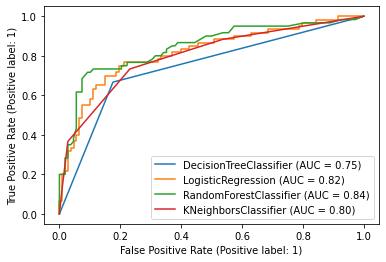

In [1383]:
#how well out model works on test data
disp = plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(log_reg,x_test,y_test, ax= disp.ax_)
plot_roc_curve(rf,x_test,y_test, ax= disp.ax_)
plot_roc_curve(knn,x_test,y_test, ax= disp.ax_)
plt.show()

# RandomForestClassifier

In [1384]:
rf= RandomForestClassifier() #using one more model

In [1385]:
params = {'n_estimators':[13,15],
         'criterion':['entropy'],
         'max_depth':[10,15],
         'min_samples_split':[10,11],
         'min_samples_leaf':[5,6]}

In [1386]:
grd = GridSearchCV(rf, param_grid=params)
grd.fit(x_train,y_train)
print('best_param - ', grd.best_params_)

best_param -  {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 11, 'n_estimators': 15}


In [1387]:
#Check the accuarcy of our model
clf = grd.best_estimator_
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
rf_cfm = confusion_matrix(y_test, y_pred)
print('\n conf_mat -- ', '\n', rf_cfm)
print('\n Accuracy Score---', accuracy_score(y_test, y_pred))


 conf_mat --  
 [[103   5]
 [ 31  29]]

 Accuracy Score--- 0.7857142857142857


In [1388]:
#To check recall
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.77      0.95      0.85       108
           1       0.85      0.48      0.62        60

    accuracy                           0.79       168
   macro avg       0.81      0.72      0.73       168
weighted avg       0.80      0.79      0.77       168



# saving the model to the local file system

In [1141]:
with open('Red_wine_quality_model','wb') as f: #finally svaing the model
    pickle.dump(log_reg,f)